In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# For data augmentation (if needed)
from imblearn.over_sampling import SMOTE

# Load the Excel file
file_path = r"C:\Users\bibek\Downloads\PROJECT2\digitfile_refined.xlsx"
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(df.head())


  emotion  Contrast    Energy  Homogeneity  Correlation  MeanPixelIntensity  \
0  normal  0.222830  0.179128     0.722658     0.299649            0.273350   
1  normal  0.361114  0.158563     0.691144     0.827007            0.897335   
2  normal  0.342159  0.229398     0.749775     0.204622            0.285768   
3  normal  0.146393  0.176619     0.825596     0.855362            0.691965   
4  normal  0.059502  0.384740     0.879538     0.609111            0.169407   

     StdDev  Variance  EntropyPixelIntensity  Skewness  ...  \
0  0.194575  0.124639               0.744985  0.448280  ...   
1  0.821494  0.756054               0.797857  0.092606  ...   
2  0.255926  0.170946               0.694034  0.588120  ...   
3  0.548601  0.438090               0.677432  0.136451  ...   
4  0.147570  0.091434               0.639567  0.642702  ...   

   ORB Descriptor StdDev_refined  ORB Descriptor Variance_refined  \
0                       0.126861                         0.126839   
1       

In [31]:
# General info about the data
print(df.info())

# Summary statistics of the numeric features
print(df.describe())

# Check for any missing values
print("Missing values in each column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   emotion                            300 non-null    object 
 1   Contrast                           300 non-null    float64
 2   Energy                             300 non-null    float64
 3   Homogeneity                        300 non-null    float64
 4   Correlation                        300 non-null    float64
 5   MeanPixelIntensity                 300 non-null    float64
 6   StdDev                             300 non-null    float64
 7   Variance                           300 non-null    float64
 8   EntropyPixelIntensity              300 non-null    float64
 9   Skewness                           300 non-null    float64
 10  ORB Keypoints                      300 non-null    float64
 11  ORB Descriptor Mean                300 non-null    float64

emotion
normal      50
happy       50
sad         50
fear        50
surprise    50
angry       50
Name: count, dtype: int64


C:\Users\bibek\AppData\Local\Temp\ipykernel_16956\2058116295.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion', data=df, palette="viridis")


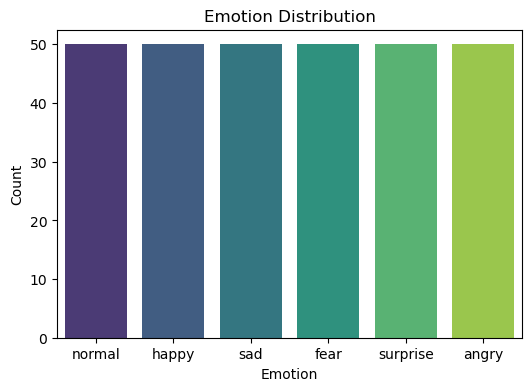

In [33]:
# Check the distribution of emotions
print(df['emotion'].value_counts())

# Plot the class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='emotion', data=df, palette="viridis")
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()


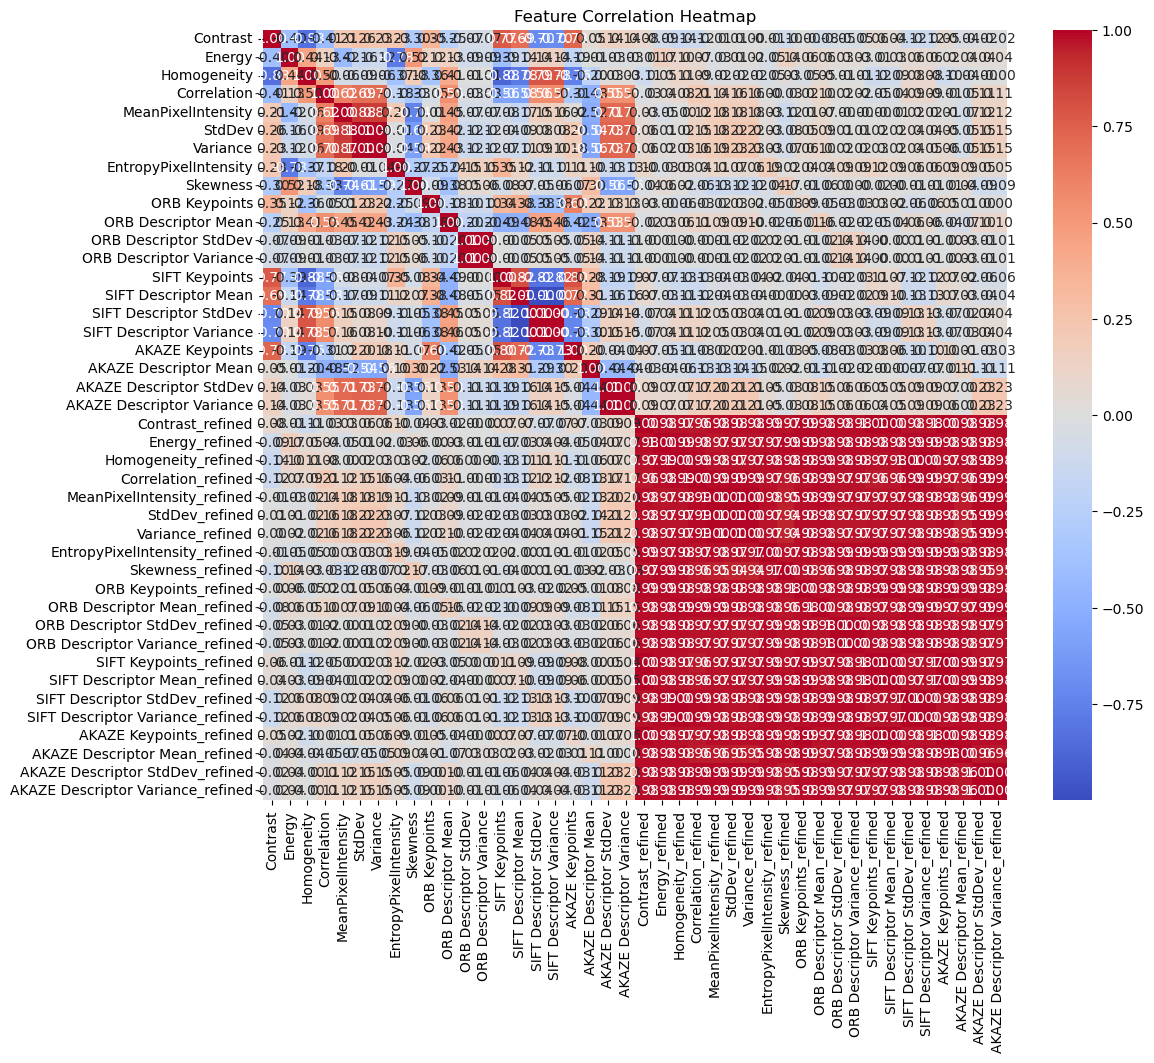

In [35]:
# Plot a correlation heatmap for all features except the emotion label
plt.figure(figsize=(12,10))
sns.heatmap(df.drop("emotion", axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


Classes: ['angry' 'fear' 'happy' 'normal' 'sad' 'surprise']


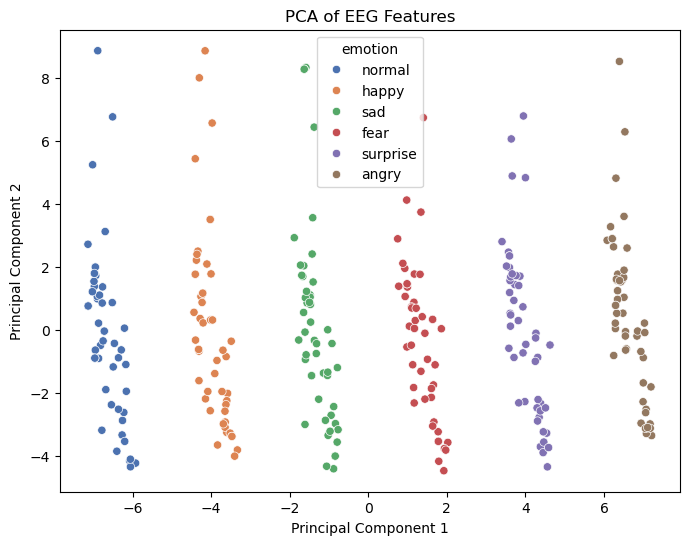

In [37]:
# Encode the emotion labels into numeric values
le = LabelEncoder()
df['emotion_encoded'] = le.fit_transform(df['emotion'])
print("Classes:", le.classes_)

# Define features and target variables
X = df.drop(['emotion', 'emotion_encoded'], axis=1)
y = df['emotion_encoded']

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Use PCA for visualization of high-dimensional data in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['emotion'], palette="deep")
plt.title("PCA of EEG Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [39]:
# Apply SMOTE for data augmentation if needed
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)
print("Class distribution after SMOTE:")
print(pd.Series(y_res).value_counts())


Class distribution after SMOTE:
emotion_encoded
3    50
2    50
4    50
1    50
5    50
0    50
Name: count, dtype: int64


In [41]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

# Initialize classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel='rbf', random_state=42)

# Train the Random Forest Classifier
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate Random Forest performance
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Random Forest Accuracy: 1.0


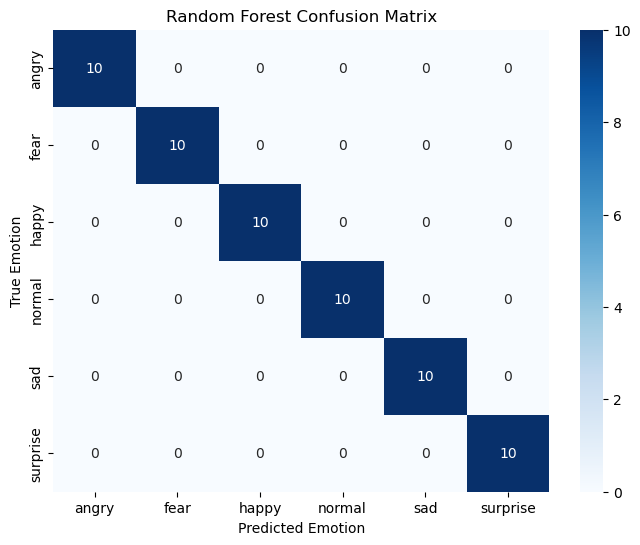

In [43]:
# Plot confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues", 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()


In [45]:
# Train the SVM Classifier
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

# Evaluate SVM performance
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

SVM Accuracy: 1.0


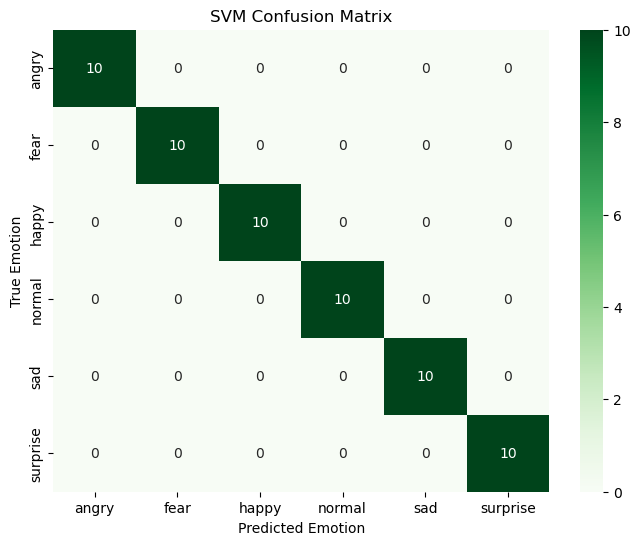

In [47]:
# Plot confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="Greens",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

Logistic Regression Accuracy: 1.0


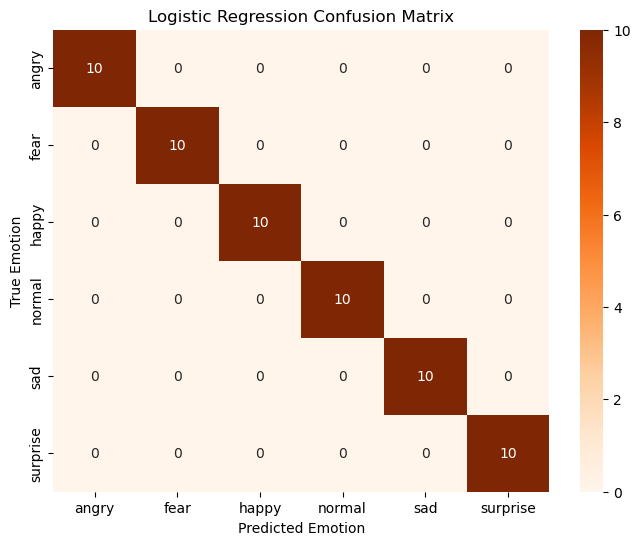

k-NN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        10
           4       1.00      0.80      0.89        10
           5       1.00      0.90      0.95        10

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60

k-NN Accuracy: 0.95


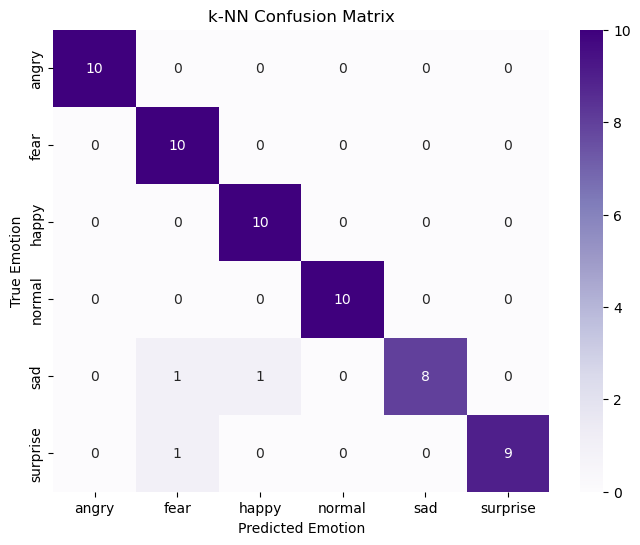

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      1.00      1.00        10
           2       1.00      0.80      0.89        10
           3       0.83      1.00      0.91        10
           4       1.00      1.00      1.00        10
           5       1.00      0.90      0.95        10

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60

Decision Tree Accuracy: 0.95


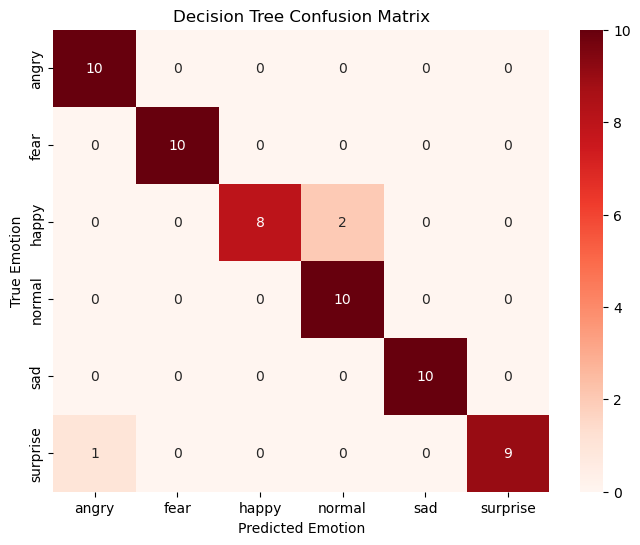

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        10
           4       1.00      0.90      0.95        10
           5       1.00      1.00      1.00        10

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Gradient Boosting Accuracy: 0.9833333333333333


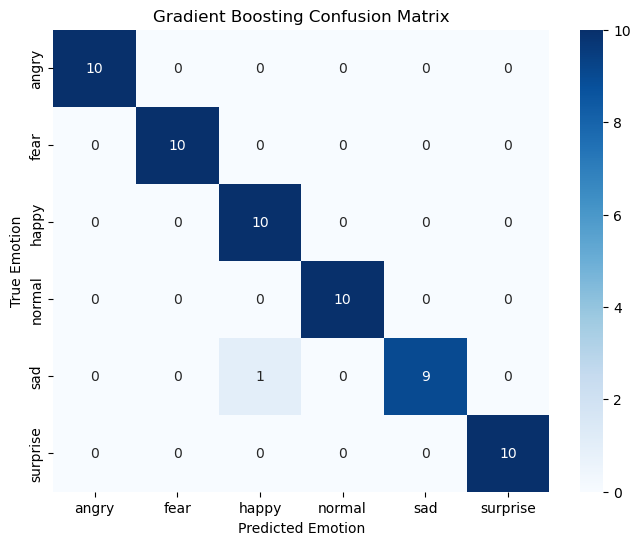

C:\Users\bibek\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      1.00      1.00        10
           2       1.00      0.90      0.95        10
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        10
           5       1.00      0.80      0.89        10

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60

MLP Classifier Accuracy: 0.95


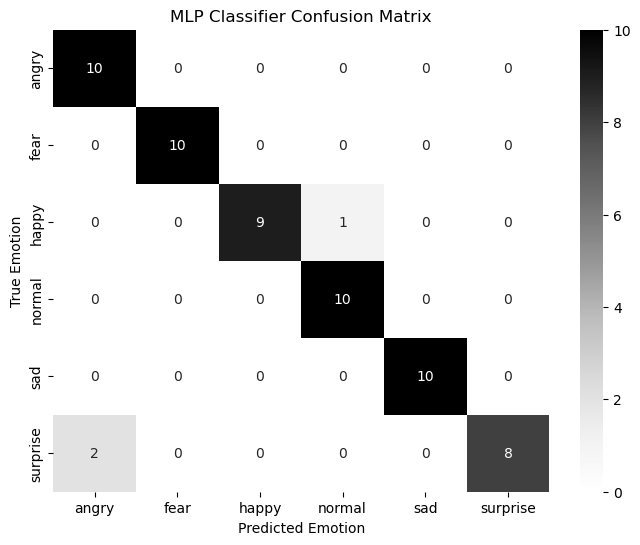

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------------------------
# 1. Logistic Regression
# -------------------------
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression(max_iter=1000, random_state=42)
logreg_clf.fit(X_train, y_train)
y_pred_logreg = logreg_clf.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8,6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap="Oranges",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()

# -------------------------
# 2. k-Nearest Neighbors (k-NN)
# -------------------------
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

print("k-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Purples",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("k-NN Confusion Matrix")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()

# -------------------------
# 3. Decision Tree
# -------------------------
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8,6))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap="Reds",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()

# -------------------------
# 4. Gradient Boosting Classifier
# -------------------------
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8,6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()

# -------------------------
# 5. Multi-layer Perceptron (MLP)
# -------------------------
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred_mlp = mlp_clf.predict(X_test)

print("MLP Classifier Classification Report:")
print(classification_report(y_test, y_pred_mlp))
print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))

cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8,6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap="Greys",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("MLP Classifier Confusion Matrix")
plt.xlabel("Predicted Emotion")
plt.ylabel("True Emotion")
plt.show()
